In [5]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
% matplotlib inline
from six.moves import cPickle
from sklearn.preprocessing import LabelEncoder
from six.moves import cPickle

In [6]:
claim = pd.read_csv('./Data/challenge_Data/BGCON_CLAIM_DATA.csv',
                    encoding='utf-16')

In [36]:
claim.NON_PAY_RATIO.dropna().mean()

0.08737030459652985

In [37]:
claim.NON_PAY_RATIO.dropna().std()

0.24329083195069526

In [24]:
claim.describe()['DMND_AMT']

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1.190200e+05
mean     8.114452e+05
std      4.174797e+06
min      0.000000e+00
25%      1.000000e+05
50%      2.400000e+05
75%      5.000000e+05
max      3.006636e+08
Name: DMND_AMT, dtype: float64

In [4]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119020 entries, 0 to 119019
Data columns (total 39 columns):
CUST_ID            119020 non-null int64
POLY_NO            119020 non-null int64
ACCI_OCCP_GRP1     117603 non-null object
ACCI_OCCP_GRP2     117603 non-null object
CHANG_FP_YN        119020 non-null object
CNTT_RECP_SQNO     119020 non-null int64
RECP_DATE          119020 non-null int64
ORIG_RESN_DATE     119020 non-null int64
RESN_DATE          119020 non-null int64
CRNT_PROG_DVSN     119020 non-null int64
ACCI_DVSN          119020 non-null int64
CAUS_CODE          119020 non-null object
CAUS_CODE_DTAL     119020 non-null object
DSAS_NAME          119020 non-null object
DMND_RESN_CODE     119020 non-null int64
DMND_RSCD_SQNO     119020 non-null int64
HOSP_OTPA_STDT     86449 non-null float64
HOSP_OTPA_ENDT     86449 non-null float64
RESL_CD1           119020 non-null object
RESL_NM1           119020 non-null object
VLID_HOSP_OTDA     119020 non-null int64
HOUSE_HOSP_DIST   

In [3]:
claim.head(10)

,CUST_ID,POLY_NO,ACCI_OCCP_GRP1,ACCI_OCCP_GRP2,CHANG_FP_YN,CNTT_RECP_SQNO,RECP_DATE,ORIG_RESN_DATE,RESN_DATE,CRNT_PROG_DVSN,...,PMMI_DLNG_YN,SELF_CHAM,NON_PAY,TAMT_SFCA,PATT_CHRG_TOTA,DSCT_AMT,COUNT_TRMT_ITEM,DCAF_CMPS_XCPA,NON_PAY_RATIO,HEED_HOSP_YN
0,5936,1365,8.기타,학생,Y,2006011200001,20060112,20060109,20060109,11,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
1,5936,6151,8.기타,학생,Y,2006011200002,20060112,20060109,20060109,11,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
2,5936,10364,8.기타,학생,Y,2006011200003,20060112,20060109,20060109,11,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
3,1043,1247,1.주부,주부,N,2006011200004,20060112,20060105,20060105,23,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
4,8545,11236,1.주부,주부,Y,2006011200005,20060112,20060110,20060110,11,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
5,4734,95991,8.기타,학생,Y,2006011200006,20060112,20060103,20060103,11,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
6,9416,75504,2.자영업,자영업,N,2006012600001,20060126,20051223,20060101,11,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
7,20267,78879,1.주부,주부,Y,2006012600002,20060126,20060103,20060103,23,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
8,2778,81980,5.서비스,2차산업 종사자,N,2006021500001,20060215,20030320,20060116,11,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
9,9019,71773,8.기타,학생,N,2006021500002,20060215,20040903,20060201,11,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N


# Step1

In [4]:
description = pd.read_excel('./Data/challenge_Data/description.xlsx', sheetname='BGCON_CLAIM_DATA')
categorical = list(description.loc[description['변수타입'] == 'C', '변수영문명'])
numerical = list(description.loc[description['변수타입'] == 'N', '변수영문명'])

In [5]:
features = list(claim.columns)
target = []
for feature in features:
    if claim[feature].isnull().sum() != 0:
        target.append(feature)

In [6]:
n_target = set(target).intersection(set(numerical))
c_target = set(target).intersection(set(categorical))
n_target = list(n_target)
c_target = list(c_target)

In [7]:
print(n_target)
print(c_target)

['NON_PAY', 'DSCT_AMT', 'TAMT_SFCA', 'SELF_CHAM', 'HOSP_CODE', 'HOUSE_HOSP_DIST', 'PATT_CHRG_TOTA', 'COUNT_TRMT_ITEM']
['PAYM_DATE', 'HOSP_OTPA_ENDT', 'ACCI_HOSP_ADDR', 'ACCI_OCCP_GRP2', 'ACCI_OCCP_GRP1', 'HOSP_SPEC_DVSN', 'HOSP_OTPA_STDT']


# Step2

In [8]:
object_type = []
non_object_type = []
for c in categorical:
    if claim[c].dtype == 'O':
        object_type.append(c)
    else:
        non_object_type.append(c)

# Step3

In [9]:
for ot in object_type:
    print(ot)
    if ot in c_target:
        claim.loc[claim[ot].isnull(), ot] = '-999'
        X = claim.loc[claim[ot] != '-999', ot].values
        lbl_enc = LabelEncoder()
        lbl_enc.fit(X)
        claim.loc[claim[ot] != '-999', ot] = lbl_enc.transform(X)
        claim.loc[claim[ot] == '-999', ot] = -999
        claim[ot] = claim[ot].astype(np.int64)
    else:
        X = claim[ot].values
        lbl_enc = LabelEncoder()
        lbl_enc.fit(X)
        claim[ot] = lbl_enc.transform(X)
        claim[ot] = claim[ot].astype(np.int64)
    print('completed!')

ACCI_OCCP_GRP1
completed!
ACCI_OCCP_GRP2
completed!
CHANG_FP_YN
completed!
CAUS_CODE
completed!
CAUS_CODE_DTAL
completed!
DSAS_NAME
completed!
RESL_CD1
completed!
RESL_NM1
completed!
ACCI_HOSP_ADDR
completed!
PMMI_DLNG_YN
completed!
HEED_HOSP_YN
completed!


# Step4

In [10]:
for k in non_object_type:
    claim.loc[claim[k].isnull(), k] = -999

# Step5

In [11]:
print(n_target)

['NON_PAY', 'DSCT_AMT', 'TAMT_SFCA', 'SELF_CHAM', 'HOSP_CODE', 'HOUSE_HOSP_DIST', 'PATT_CHRG_TOTA', 'COUNT_TRMT_ITEM']


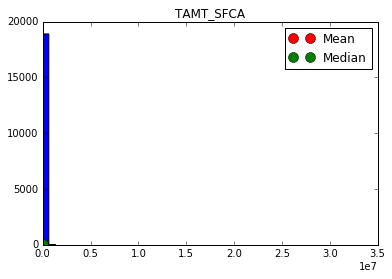

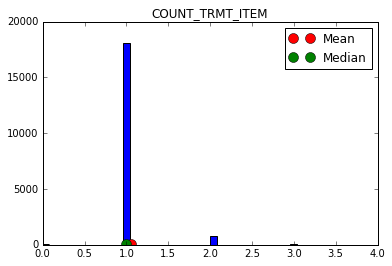

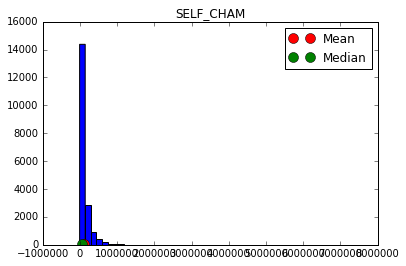

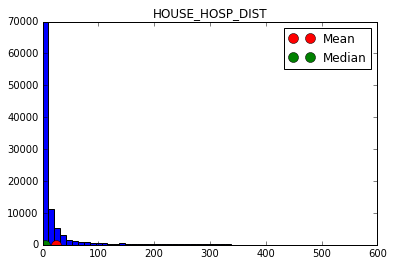

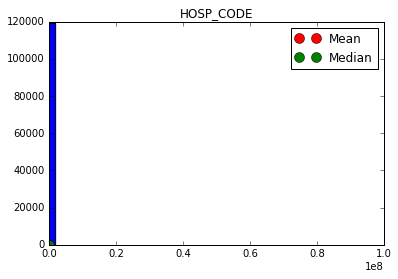

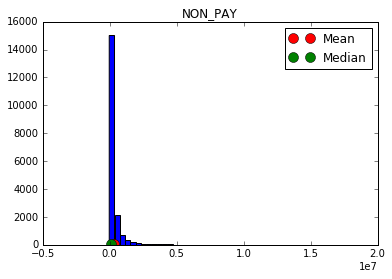

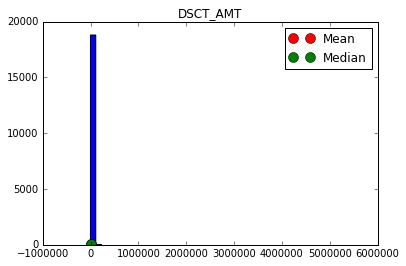

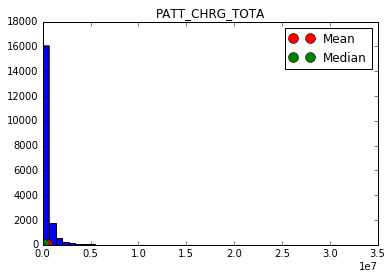

In [12]:
# Decide whether fill missing values with median or mean
n_dic = {}
for nt in n_target:
    values = claim.loc[~claim[nt].isnull(), nt].values
    n_dic[nt] = values

for key in list(n_dic.keys()):
    plt.hist(n_dic[key], bins=50)
    plt.plot(np.mean(n_dic[key]), 50, 'ro', markersize=10, label='Mean')
    plt.plot(np.median(n_dic[key]), 50, 'go', markersize=10, label='Median')
    plt.legend(loc=1)
    plt.title(key)
    plt.show()

In [13]:
for nt in n_target:
    if nt == 'COUNT_TRMT_ITEM':
        filling = np.median(claim.loc[~claim[nt].isnull(), nt].values)
        claim.loc[claim[nt].isnull(), nt] = filling
        claim[nt] = claim[nt].astype(np.float64)
    else:
        filling = np.mean(claim.loc[~claim[nt].isnull(), nt].values)
        claim.loc[claim[nt].isnull(), nt] = filling
        claim[nt] = claim[nt].astype(np.float64)

## Categorize

In [14]:
def cate_go(df, colname):
    cut = np.linspace(df[colname].min(),df[colname].max(),10)

    cate = np.arange(1,10)
    df.loc[df[colname] == cut[0], colname] = 0
    
    for i in range(0,9):
        df.loc[ (df[colname] > cut[i]) & (df[colname] <= cut[i+1]), colname] = cate[i]
    return df

def plot_col(df, colname):
    plt.hist(df[colname], bins=100)
    plt.plot(np.mean(df[colname]), 50, 'ro', markersize=10, label='Mean')
    plt.plot(np.median(df[colname]), 50, 'go', markersize=10, label='Median')
    plt.legend(loc=1)
    plt.title(colname)
    plt.show()

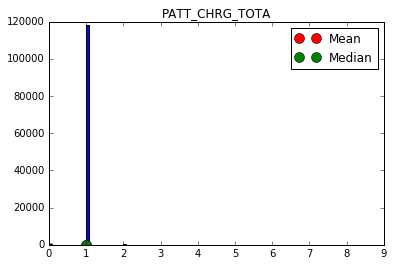

In [15]:
claim = cate_go(claim, 'PATT_CHRG_TOTA')
plot_col(claim, 'PATT_CHRG_TOTA')

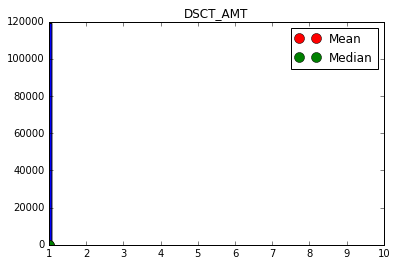

In [16]:
claim = cate_go(claim, 'DSCT_AMT')
plot_col(claim, 'DSCT_AMT')

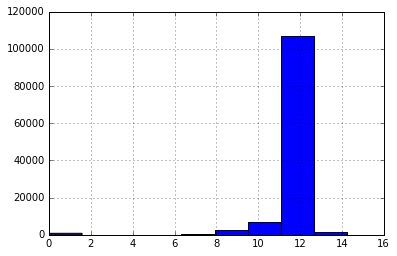

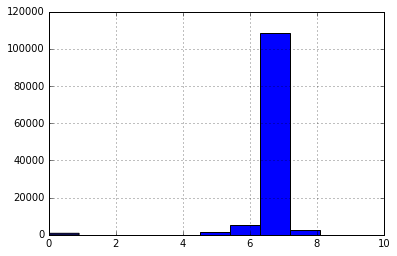

In [17]:
claim['SELF_CHAM'] = np.log(claim['SELF_CHAM'])
claim.loc[claim['SELF_CHAM'] == -np.inf, 'SELF_CHAM'] = 0
claim['SELF_CHAM'] .hist()
plt.show()
claim = cate_go(claim, 'SELF_CHAM')
claim['SELF_CHAM'] .hist()
plt.show()

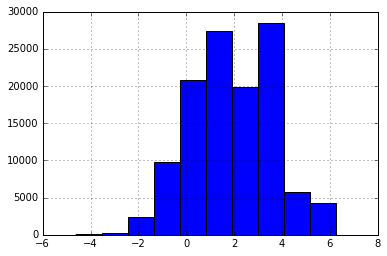

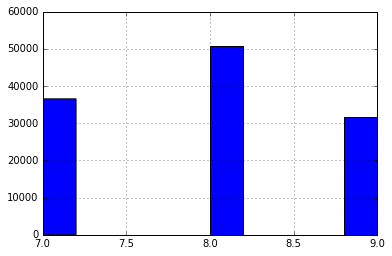

In [18]:
claim['HOUSE_HOSP_DIST'] = np.log(claim['HOUSE_HOSP_DIST'])
claim.loc[claim['HOUSE_HOSP_DIST'] == -np.inf, 'HOUSE_HOSP_DIST'] = 0
claim['HOUSE_HOSP_DIST'] .hist()
plt.show()
claim = cate_go(claim, 'HOUSE_HOSP_DIST')
claim['HOUSE_HOSP_DIST'] .hist()
plt.show()

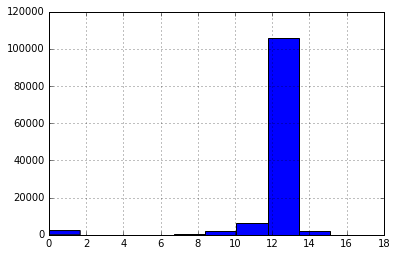

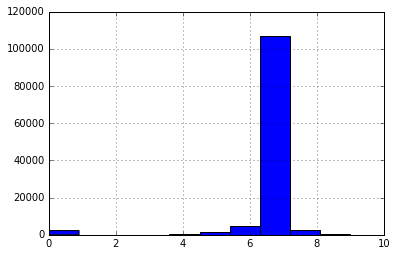

In [19]:
claim['NON_PAY'] = np.log(claim['NON_PAY'])
claim.loc[claim['NON_PAY'] == -np.inf, 'NON_PAY'] = 0
claim['NON_PAY'] .hist()
plt.show()
claim = cate_go(claim, 'NON_PAY')
claim['NON_PAY'] .hist()
plt.show()

# Step 6

In [20]:
def year_convert(input):
    if input < 0:
        return -9999
    else:
        string_type = str(input)

        string_year = string_type[0:4]

        return np.float64(string_year)

def month_convert(input):
    if input < 0 :
        return -9999
    else:
        string_type = str(input)
        string_month = string_type[5:]
        return np.float64(string_month)

def convert(df, colname):
    df[colname+'_Y'] = df[colname].apply(year_convert)
    df[colname+'_M'] = df[colname].apply(month_convert)

    df[colname+'_Y'] =df[colname+'_Y'].astype(np.int64)
    df[colname+'_M'] = df[colname+'_M'].astype(np.int64)
    return df

In [21]:
for colname in ['HOSP_OTPA_STDT', 'HOSP_OTPA_ENDT','PAYM_DATE']:
    claim = convert(claim, colname)
    claim.drop(colname, axis = 1, inplace = True)

# Step7

In [22]:
label_id = cPickle.load(open('./Dump/label_id.pkl', 'rb'))
final = pd.merge(claim, label_id, on='CUST_ID')
features = final.columns
train_set = final.loc[final['DIVIDED_SET'] == 1, features]
test_set = final.loc[final['DIVIDED_SET'] == 2, features]

In [23]:
cPickle.dump(final, open('./Dump/claim.pkl', 'wb'), -1)
cPickle.dump(train_set, open('./Dump/claim_train.pkl', 'wb'), -1)
cPickle.dump(test_set, open('./Dump/claim_test.pkl', 'wb'), -1)